In [7]:
import numpy as np 
import pandas as pd 
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # just for the last graph
from matplotlib.colors import ListedColormap # just for the last graph

First of all we analyzed the data structure to have a general idea of the variables.

In [8]:
df = pd.read_csv('train (2).csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see there are a few missing values in Age and Cabin variables.

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

We have built graphs of the dependencies of variables from each other (excluding the passengers IDs, their names and other variables carrying personal information). In this graph, you can see the distribution of variables and their dependence on each other.

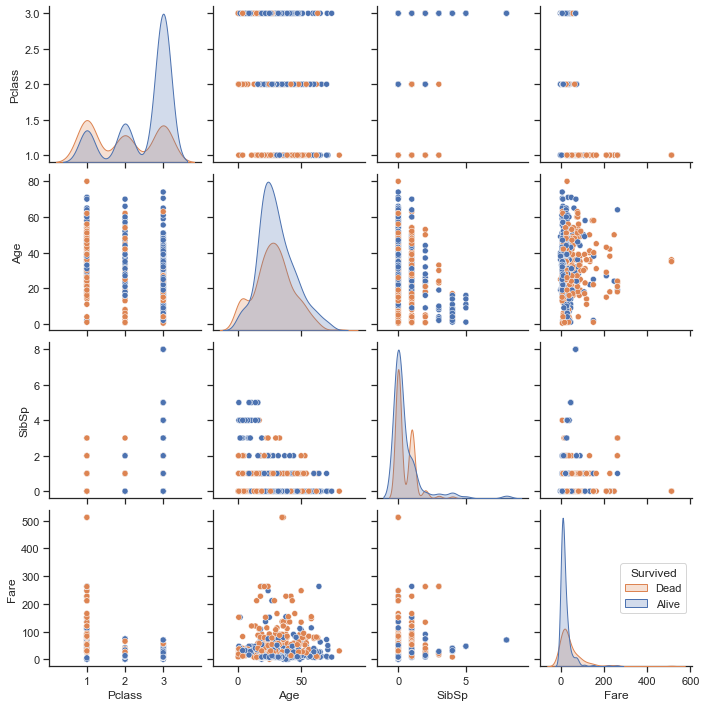

In [11]:
sns.set_theme(style="ticks")
g = sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']], hue="Survived")
g._legend.remove()
plt.legend(title='Survived', loc = 'right', labels=['Dead', 'Alive'])

After that, we built a matrix of correlations of quantitative variables in order to assess the presence of relationships between features

In [12]:
corr = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

,Survived,Pclass,Age,Fare
Survived,1.00,-0.34,-0.08,0.26
Pclass,-0.34,1.00,-0.37,-0.55
Age,-0.08,-0.37,1.00,0.10
Fare,0.26,-0.55,0.10,1.00


After that we analyzed the distributions of these variables (by histograms)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

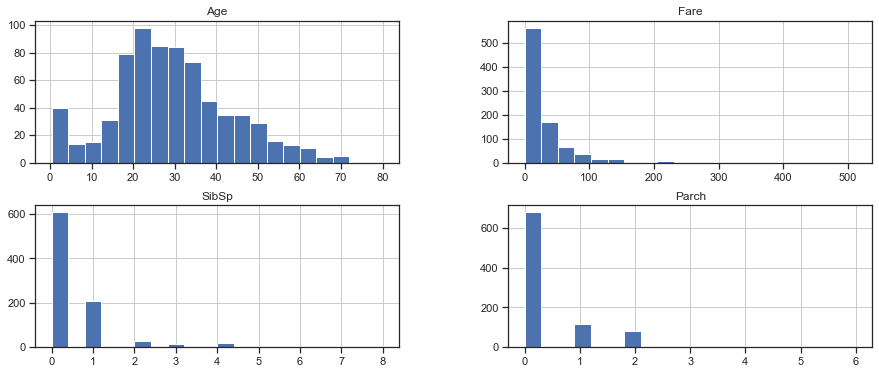

In [13]:
# df[['Quantity']].plot.hist(bins = 20, title = 'Purchases Quantity Distribution')
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical].hist(bins=20, figsize=(15, 6), layout=(2, 2))


It is also interesting to evaluate whether a person survived or died depending on the class in which he was. (0 - dead; 1 - alive)

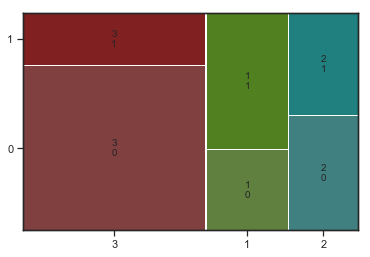

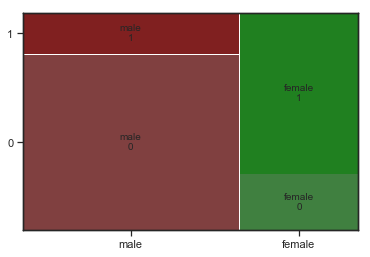

In [14]:
mosaic(df, ['Pclass', 'Survived'])
mosaic(df, ['Sex', 'Survived'])
i = 1

Then we visualized possible differences in ticket prices (fare var.) depending on the port of embarkation and passenger class. In addition, the graph can be used to assess the presence of outliers in the fare.

[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbrouk'), Text(2, 0, 'Quenstown')]

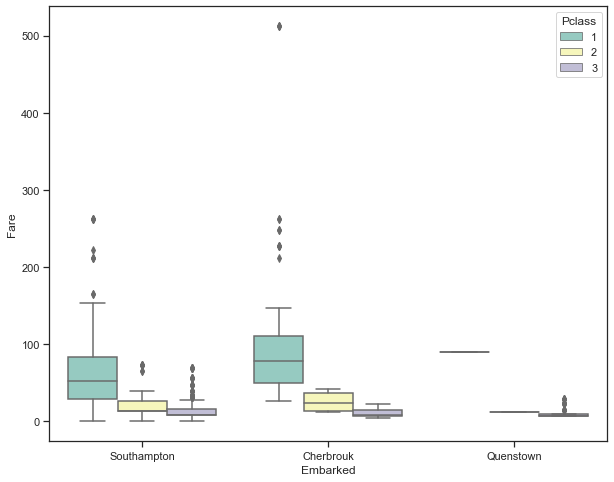

In [15]:
f = plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Embarked", y="Fare",  hue="Pclass",
                 data=df, palette="Set3")
ax.set_xticklabels(['Southampton', 'Cherbrouk', 'Quenstown'])

Further we can estimate the distribution of survival depending on age and ticket price.

<AxesSubplot:xlabel='Age', ylabel='Count'>

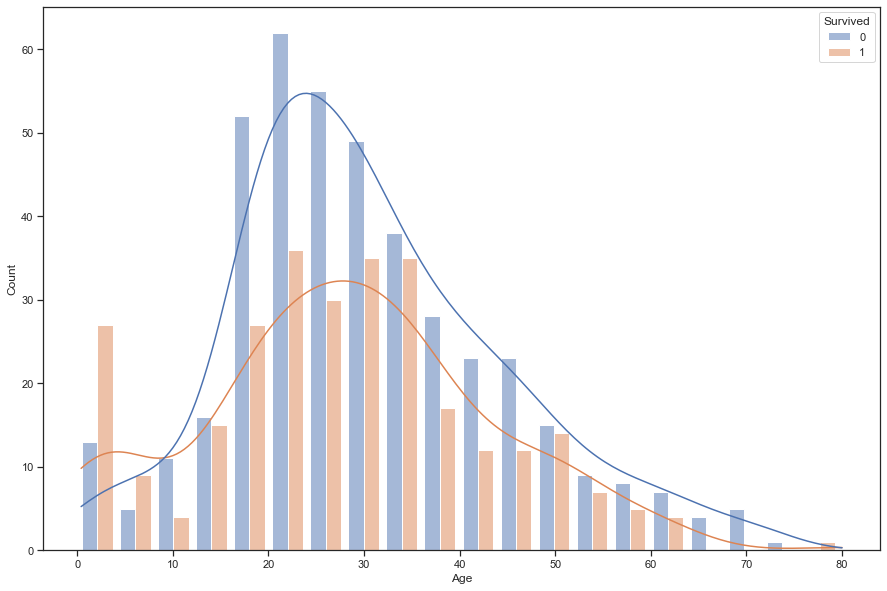

In [16]:
f = plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="Age", hue='Survived', multiple="dodge", shrink=.8, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

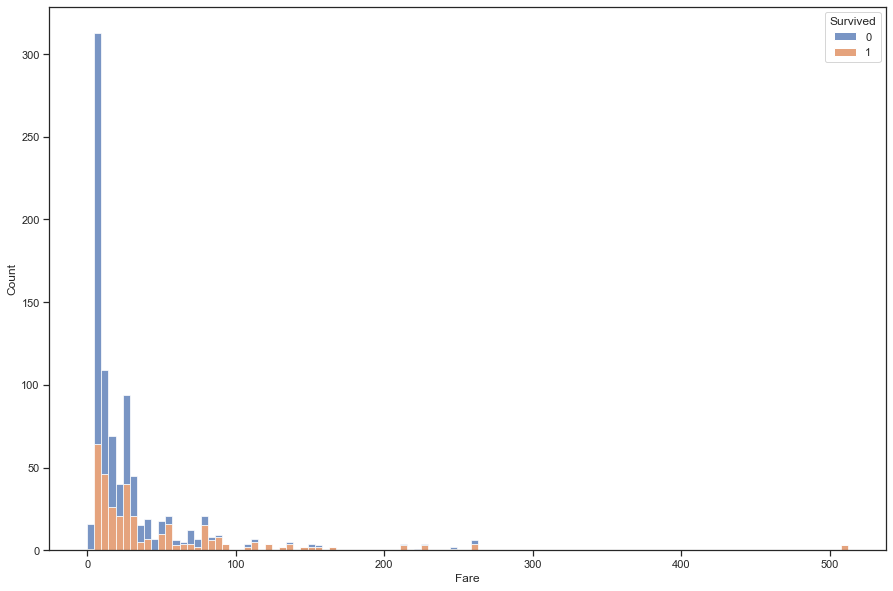

In [17]:
f = plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="Fare", hue='Survived', multiple="stack")

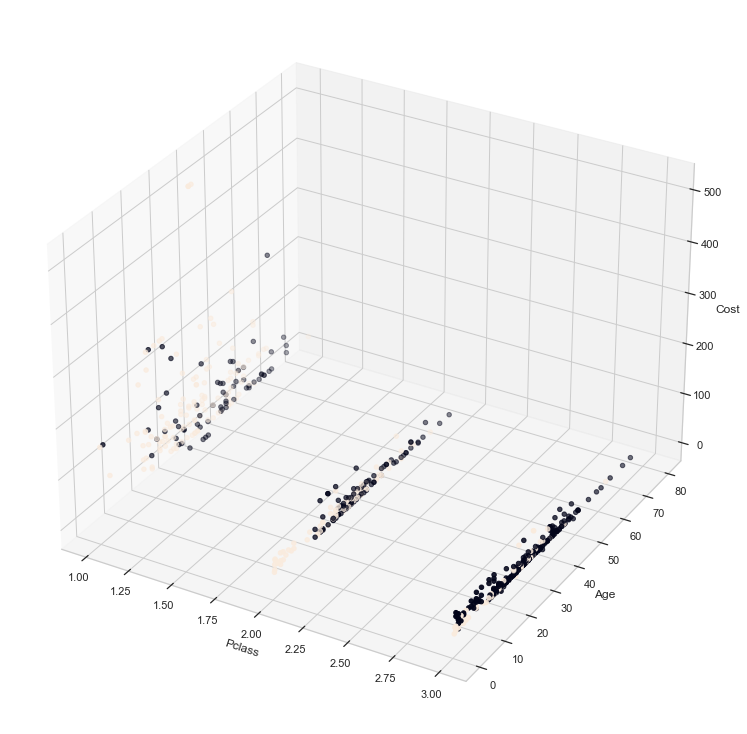

In [18]:

fig = plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = Axes3D(fig)
x = df['Pclass']
y = df['Age']
z = df['Fare']

ax.set_xlabel("Pclass")
ax.set_ylabel("Age")
ax.set_zlabel("Cost")

ax.scatter(x, y, z, c=df['Survived'])

We can see that third grade adult males were least likely to survive. The cost of the ticket (most likely) did not depend on the port of landing of the passenger. In addition, various dataset variables do not correlate strongly with each other. 